In [2]:
# project-1-deep-learning-image-classification-with-cnn

1. Picking a dataset

We pick dataset CIFAR-10 since we are already familiar with the data.

**2. Data Preprocessing**

In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [5]:
# Resizing the images of the dataset

# Resize images to 128x128
x_train_resized = tf.image.resize(x_train, [128, 128])
x_test_resized = tf.image.resize(x_test, [128, 128])

# Check the new shape of the images
print(x_train_resized.shape)  # Should print (50000, 128, 128, 3)
print(x_test_resized.shape)   # Should print (10000, 128, 128, 3)

(50000, 128, 128, 3)
(10000, 128, 128, 3)


In [6]:
# Data augmentation to enlarge the dataset

# Initialize the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,    # Rotate the image by a random angle between -20 and 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20%
    height_shift_range=0.2,  # Shift the image vertically by 20%
    shear_range=0.2,      # Shear angle in counterclockwise direction
    zoom_range=0.2,       # Zoom in on the image by 20%
    horizontal_flip=True,  # Flip the images horizontally
    fill_mode='nearest'   # Fill empty pixels after transformations with the nearest pixel value
)

# Fit the generator to your resized data (this step may be optional for some augmentations)
datagen.fit(x_train_resized)



In [7]:
# Normalize augmented images and x_test data

# Define the ImageDataGenerator with normalization
datagen = ImageDataGenerator(rescale=1./255)

# Create the iterator with augmented images
augmented_images = datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
#one-hot encoding

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)



(50000, 10)
(10000, 10)


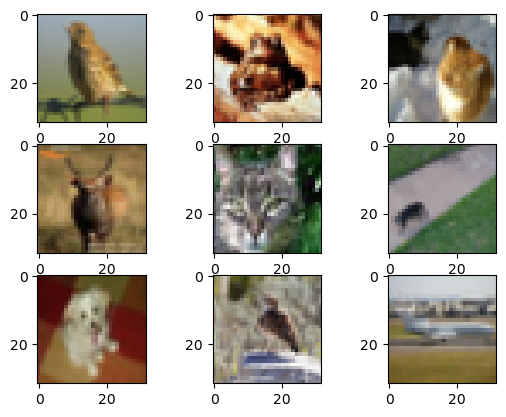

In [9]:
#ploting

# Get a batch of augmented images
augmented_batch = next(augmented_images)

# augmented_batch[0] contains the images, and augmented_batch[1] contains the labels
images_batch = augmented_batch[0]

# Plot 9 images from the batch
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images_batch[i], cmap=plt.get_cmap('gray'))
plt.show()


3. Model Architecture

In [10]:
# Building CNN model

model_simple = Sequential()

model_simple.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
model_simple.add(MaxPooling2D((2, 2)))
model_simple.add(Flatten())
model_simple.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_simple.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Model Training

In [11]:
'''
batch_size = 512
epochs = 50

model_simple.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_simple.fit(augmented_images, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

'''

'\nbatch_size = 512\nepochs = 50\n\nmodel_simple.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])\n\nmodel_simple.fit(augmented_images, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)\n\n'

5. Model Evaluation

In [12]:
# random comment

6. Transfer Learning

7. Model deployment